In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import scipy
import torch
import torchvision


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(8192, 128)
        self.relu3 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x



if __name__ == '__main__':
    # Transform the CIFAR-10 dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Load the CIFAR-10 dataset
    train_set = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

    model = Net()

    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    loss_fn = nn.CrossEntropyLoss()

    # Train the model
    for epoch in range(10):
        for i, data in enumerate(train_loader):
            inputs, labels = data

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            # Backward pass
            loss.backward()

            # Update parameters
            optimizer.step()

            # Print progress
            if (i + 1) % 100 == 0:
                print('Epoch [{0}/{1}], Step [{2}/{3}], Loss: {4:.4f}'.format(
                    epoch + 1, 10, i + 1, len(train_loader), loss.item()))


Files already downloaded and verified
Epoch [1/10], Step [100/782], Loss: 2.2556
Epoch [1/10], Step [200/782], Loss: 2.1311
Epoch [1/10], Step [300/782], Loss: 2.0934
Epoch [1/10], Step [400/782], Loss: 1.8961
Epoch [1/10], Step [500/782], Loss: 1.8937
Epoch [1/10], Step [600/782], Loss: 1.9457
Epoch [1/10], Step [700/782], Loss: 1.8518
Epoch [2/10], Step [100/782], Loss: 1.7345
Epoch [2/10], Step [200/782], Loss: 1.6841
Epoch [2/10], Step [300/782], Loss: 1.6228
Epoch [2/10], Step [400/782], Loss: 1.6604
Epoch [2/10], Step [500/782], Loss: 1.6405
Epoch [2/10], Step [600/782], Loss: 1.6240
Epoch [2/10], Step [700/782], Loss: 1.5368
Epoch [3/10], Step [100/782], Loss: 1.3549
Epoch [3/10], Step [200/782], Loss: 1.3994
Epoch [3/10], Step [300/782], Loss: 1.4096
Epoch [3/10], Step [400/782], Loss: 1.6410
Epoch [3/10], Step [500/782], Loss: 1.7849
Epoch [3/10], Step [600/782], Loss: 1.3443
Epoch [3/10], Step [700/782], Loss: 1.4014
Epoch [4/10], Step [100/782], Loss: 1.3135
Epoch [4/10], St

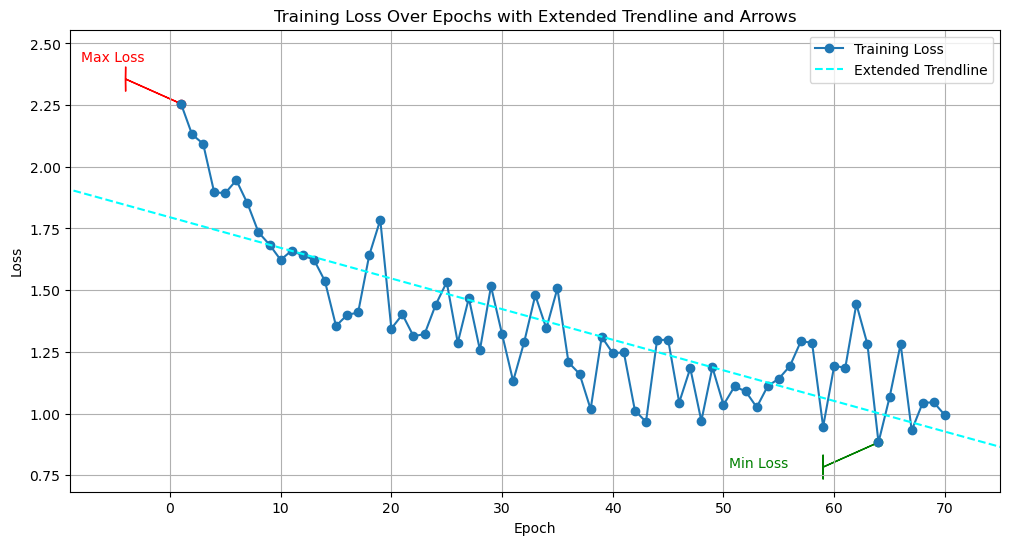

In [40]:

loss_values = [
    2.2556, 2.1311, 2.0934, 1.8961, 1.8937, 1.9457, 1.8518,
    1.7345, 1.6841, 1.6228, 1.6604, 1.6405, 1.6240, 1.5368,
    1.3549, 1.3994, 1.4096, 1.6410, 1.7849, 1.3443, 1.4014,
    1.3135, 1.3218, 1.4401, 1.5326, 1.2869, 1.4679, 1.2578,
    1.5155, 1.3214, 1.1314, 1.2900, 1.4794, 1.3450, 1.5075,
    1.2071, 1.1607, 1.0175, 1.3104, 1.2445, 1.2477, 1.0119,
    0.9665, 1.2977, 1.2991, 1.0446, 1.1838, 0.9698, 1.1869,
    1.0349, 1.1097, 1.0900, 1.0254, 1.1114, 1.1413, 1.1926,
    1.2937, 1.2863, 0.9464, 1.1930, 1.1855, 1.4438, 1.2812,
    0.8830, 1.0654, 1.2816, 0.9316, 1.0441, 1.0447, 0.9932
]
epochs = list(range(1, len(loss_values) + 1))

# Linear regression to get trendline
fit = np.polyfit(epochs, loss_values, 1)
trendline = np.poly1d(fit)

# Extend the trendline beyond the borders of the plot
extended_epochs = np.arange(-30, len(loss_values) + 100)  # Adjust the range as needed
extended_trendline = np.poly1d(np.polyfit(epochs, loss_values, 1))(extended_epochs)

min_loss_index = np.argmin(loss_values)
max_loss_index = np.argmax(loss_values)

plt.figure(figsize=(12, 6))

plt.plot(epochs, loss_values, marker='o', label='Training Loss')
plt.plot(extended_epochs, extended_trendline, '--', label='Extended Trendline', color='cyan', alpha=1)
plt.scatter(epochs[min_loss_index], loss_values[min_loss_index], color='green', marker='o')
plt.scatter(epochs[max_loss_index], loss_values[max_loss_index], color='red', marker='o')

plt.arrow(epochs[min_loss_index], loss_values[min_loss_index], -5, -0.1,
          head_width=0.1, head_length=0.02, fc='green', ec='green')
plt.arrow(epochs[max_loss_index], loss_values[max_loss_index], -5, 0.1,
          head_width=0.1, head_length=0.02, fc='red', ec='red')

plt.text(epochs[min_loss_index] - 13.5, loss_values[min_loss_index] - 0.1, 'Min Loss', color='green')
plt.text(epochs[max_loss_index] - 9, loss_values[max_loss_index] + 0.17, 'Max Loss', color='red')

plt.xlim(min(epochs) - 10, max(epochs) + 5)
plt.ylim(min(loss_values) - 0.2, max(loss_values) + 0.3)

plt.title('Training Loss Over Epochs with Extended Trendline and Arrows')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
plt.show()


In [41]:
mean_value = np.mean(loss_values)
variance_value = np.var(loss_values)

print("Mean:", mean_value)
print("Variance:", variance_value)

Mean: 1.3549114285714285
Variance: 0.09303120386938774


In [63]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image

model = torch.load('your_model2.pth')

image_path = r"C:\Users\ivan.zeljeznjak\Downloads\istockphoto-104241367-612x612.jpg"
image = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

input_image = transform(image)

input_image = input_image.unsqueeze(0)

model.eval()

with torch.no_grad():
    output = model(input_image)

probabilities = F.softmax(output, dim=1)

predicted_class = torch.argmax(probabilities, dim=1).item()

cifar10_classes = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

predicted_class_label = cifar10_classes[predicted_class]
print("Predicted Class:", predicted_class_label)


Predicted Class: Airplane


In [48]:
torch.save(model.state_dict(), 'your_model.pth')


In [49]:
model = Net()

state_dict = torch.load('your_model.pth')

model.load_state_dict(state_dict)

model.eval()


Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=8192, out_features=128, bias=True)
  (relu3): ReLU()
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [66]:
import pandas as pd

# Create a DataFrame
data = {
    'Epoch': epochs,
    'Loss': loss_values
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('loss_data.csv', index=False)


In [50]:
torch.save(model, 'your_model2.pth')


In [70]:
csv_file_path = 'loss_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)



0.6321205588285577

In [51]:
# Load the entire model
model = torch.load('your_model2.pth')

# Set the model to evaluation mode
model.eval()


Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=8192, out_features=128, bias=True)
  (relu3): ReLU()
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)